In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_excel('/content/analydata.xlsx')
df.replace({'개인(급.만성)질환':1}, inplace= True)
df.replace({'개인질환':2}, inplace= True)
df.replace({'고온환경질환':3}, inplace= True)
df.replace({'기타산악':4}, inplace= True)
df.replace({'낙석·낙빙':5}, inplace= True)
df.replace({'산악기타':6}, inplace= True)
df.replace({'실족추락':7}, inplace= True)
df.replace({'암벽등반':8}, inplace= True)
df.replace({'야생식물 섭취 중독':9}, inplace= True)
df.replace({'일반조난':10}, inplace= True)
df.replace({'저체온증':11}, inplace= True)
df.replace({'탈진·탈수':12}, inplace= True)
df.replace({'자살기도(산악)':13}, inplace= True)

df.head()

,사고원인코드명_사고종별,기온(°C),강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),현지기압(hPa),적설(cm),지면온도(°C)
0,7,2.0,NaN,1.5,71.0,-2.7,1005.9,NaN,0.7
1,7,2.0,NaN,1.5,71.0,-2.7,1005.9,NaN,0.7
2,4,11.2,NaN,1.5,37.0,-2.9,1009.8,NaN,9.9
3,7,3.1,NaN,0.2,78.0,-0.3,1018.4,NaN,0.1
4,10,5.4,NaN,0.6,62.0,-1.3,1009.3,NaN,0.9


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터셋 불러오기
target = pd.DataFrame(df['사고원인코드명_사고종별'])
df1 = df[['기온(°C)', '강수량(mm)','풍속(m/s)','습도(%)', '이슬점온도(°C)', '적설(cm)','지면온도(°C)']]
df1['강수여부'] = np.where(df['강수량(mm)']==0.0, 0, 1)
df1['적설여부'] =np.where(df1['적설(cm)']==0.0, 0, 1)


# train과 test 데이터셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(df1.fillna(0), target, test_size=0.2, random_state=42)


print(y_test.head())
print(y_train.head())

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: ", rmse)
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

<ipython-input-5-5d9000a1fdb2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['강수여부'] = np.where(df['강수량(mm)']==0.0, 0, 1)


       사고원인코드명_사고종별
8710              4
11898             4
2366              7
6292              2
169               4
       사고원인코드명_사고종별
180               2
12364             2
11864             4
2218              4
13221             4
[[6.45150954]
 [5.79048776]
 [6.30608001]
 ...
 [6.46641701]
 [5.82810542]
 [7.40281879]]
RMSE:  2.9500763398399483
Intercept:  [4.59600053]
Coefficient:  [[ 0.15013646 -0.02474485  0.01122681  0.02680202 -0.06450311 -0.01384045
  -0.06822612  0.31923356 -0.51854745]]


y_pred: [[6.45150954]
 [5.79048776]
 [6.30608001]
 [5.80643194]
 [5.62118313]]
y_test:        사고원인코드명_사고종별
8710              4
11898             4
2366              7
6292              2
169               4
R2 score: 0.021105131306241254


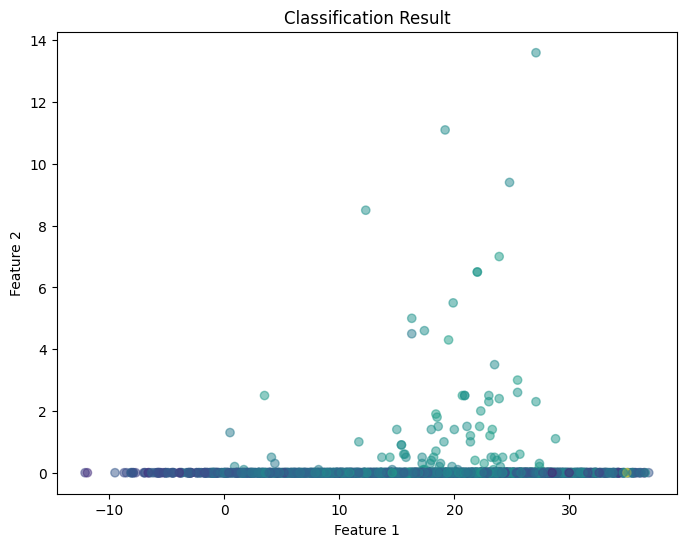

In [6]:
from sklearn.metrics import accuracy_score, r2_score

# 모델 예측값과 타겟값 확인
y_pred = model.predict(X_test)
print("y_pred:", y_pred[:5])
print("y_test:", y_test[:5])

# 모델 예측값이 범주형인 경우
if isinstance(y_pred[0], str) or isinstance(y_pred[0], int):
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy score:", acc)

# 모델 예측값이 연속형인 경우
else:
    r2 = r2_score(y_test, y_pred)
    print("R2 score:", r2)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='viridis', alpha=0.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Classification Result')
plt.show()


Logistic regression - one_hot_encoding

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 불러오기
df = pd.read_excel('/content/analydata.xlsx')

# 입력 변수와 출력 변수로 분리
X = df.drop('사고원인코드명_사고종별', axis=1)
y = df['사고원인코드명_사고종별']

# One-hot encoding을 적용하여 2차원 배열로 변환
ohe = OneHotEncoder(sparse=False)
y_ohe = ohe.fit_transform(y.values.reshape(-1, 1))

# 학습 데이터와 검증 데이터로 분리
X_train, X_test, y_train_ohe, y_test_ohe = train_test_split(X, y_ohe, test_size=0.2, random_state=42)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score: 0.386128364389234


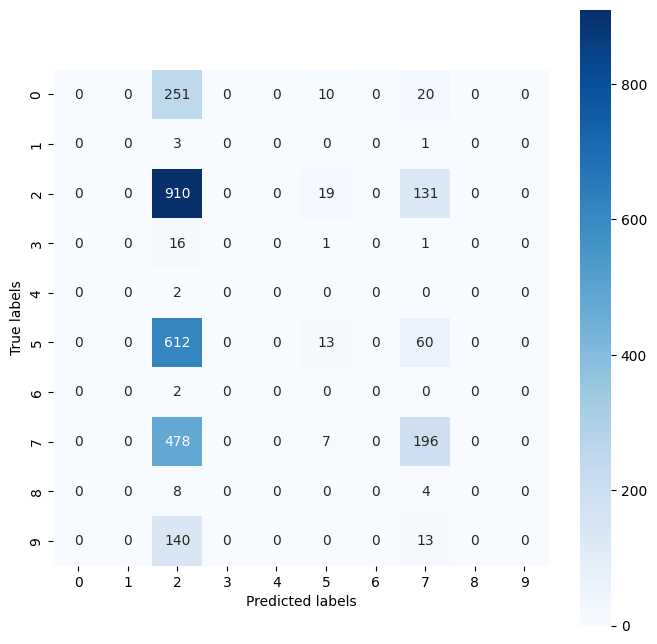

In [8]:
# 원래의 레이블 값으로 변환
y_train = np.argmax(y_train_ohe, axis=1)
y_test = np.argmax(y_test_ohe, axis=1)

# 로지스틱 회귀 모델 생성
model = LogisticRegression(max_iter=1000)

# 모델 학습
model.fit(X_train.fillna(0), y_train)

# 검증 데이터로 예측
y_pred = model.predict(X_test.fillna(0))

# 정확도 계산
acc = accuracy_score(y_test, y_pred)
print("Accuracy score:", acc)

# 오차 행렬 시각화
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


using PolynomialFeaturese -> preprocessing X

*   data는 encoding된 data 사용
*   OHE 된 label 까지 correlation plt로 확인
*   아예 인코딩 된 라벨까지 새 DF로 만들어서 train/test 분리
*   우선은 적용했던 LinearRegression 모델 test
*   이후 SVM 혹은 DecisionTreeRegressor 사용


*   result

1.   polynomial 적용X rmse => 2.XX
2.   polynomial 적용O rmse => 0.4X
->   유의미하다고 볼 수 는 있겠다,,,plot으로 구분되는 과정 시각화
->   진짜 전부 다 0번으로 분류됨,,,의미가 있나?


*   SVM에서는? / DecisionTree에서는?














       기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  이슬점온도(°C)  현지기압(hPa)  적설(cm)  \
0         2.0      NaN      1.5   71.0       -2.7     1005.9     NaN   
1         2.0      NaN      1.5   71.0       -2.7     1005.9     NaN   
2        11.2      NaN      1.5   37.0       -2.9     1009.8     NaN   
3         3.1      NaN      0.2   78.0       -0.3     1018.4     NaN   
4         5.4      NaN      0.6   62.0       -1.3     1009.3     NaN   
...       ...      ...      ...    ...        ...        ...     ...   
14481     6.4      NaN      1.8   72.0        1.7     1012.4     NaN   
14482    13.5      NaN      2.2   70.0        8.1     1010.8     NaN   
14483    13.5      NaN      2.2   70.0        8.1     1010.8     NaN   
14484    12.2      NaN      1.3   70.0        6.8     1011.4     NaN   
14485    -4.9      NaN      2.7   27.0      -21.0     1023.7     NaN   

       지면온도(°C)    0    1    2    3    4    5    6    7    8    9  
0           0.7  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  

/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/util

<function matplotlib.pyplot.show(close=None, block=None)>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  func(*args, *

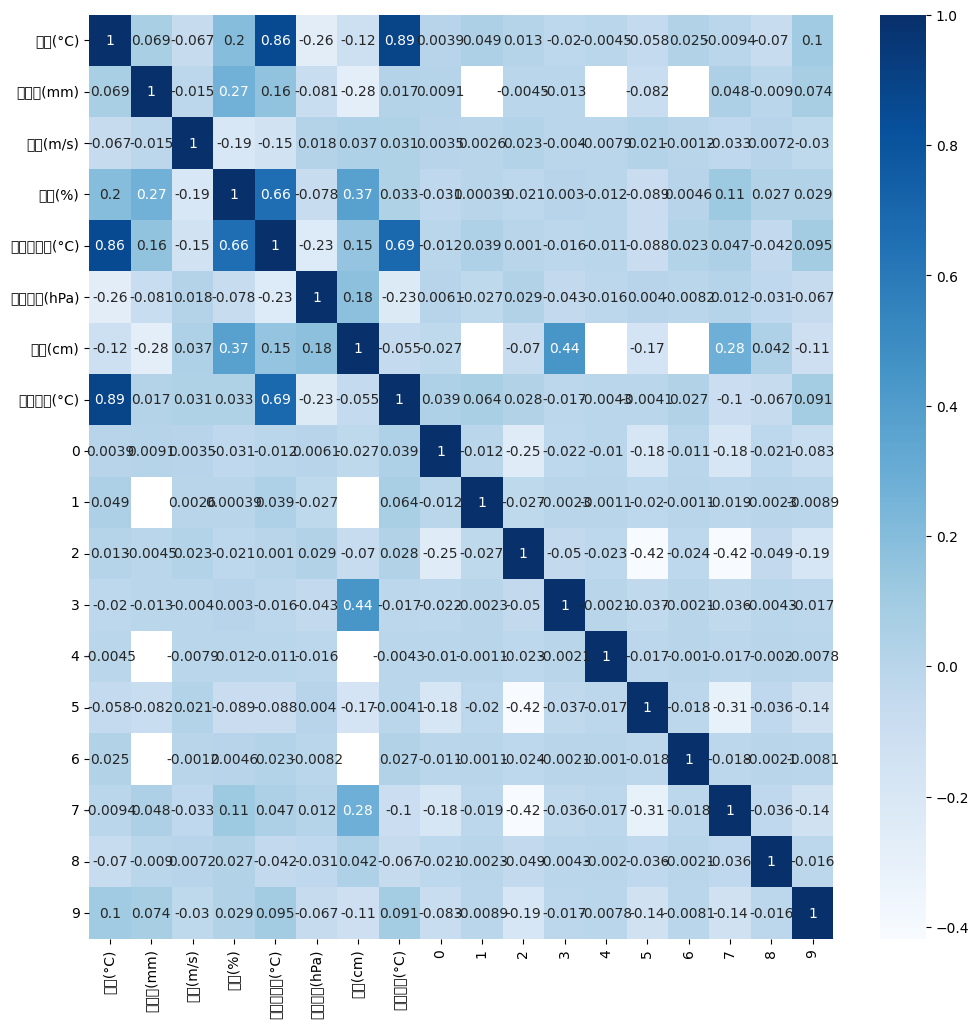

In [9]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd


plt.figure(figsize=(12,12))
label_acc = pd.DataFrame(y_ohe)
weather_dat = pd.DataFrame(X)

reshaped_df  = pd.concat([weather_dat, label_acc], axis = 1)

print(reshaped_df)

sns.heatmap(reshaped_df.corr(), annot=True, cmap='Blues')
plt.show

In [10]:
X_train, X_test, y_train_ohe, y_test_ohe = train_test_split(X, y_ohe, test_size=0.2, random_state=42, shuffle = True)


poly = PolynomialFeatures()
train_poly = pd.DataFrame(poly.fit_transform(X_train.fillna(0)))
test_poly = pd.DataFrame(poly.fit_transform(X_test.fillna(0)))
train_poly
#polynomial로 전처리 완료

model = LinearRegression()
model.fit(train_poly, y_train_ohe)

preds = model.predict(test_poly)

print(mean_squared_error(y_test_ohe, preds, squared = False))
print(np.sqrt(mean_squared_error(y_test_ohe, preds, squared = False)))

0.20659990066926665
0.45453261782766113


polynomial 이후 오차행렬시각화

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 8.88304259e-02 -1.46411211e-03  3.37845243e-01 ...  3.04464433e-01
  -7.67617389e-04  6.56763961e-02]
 [ 1.70800989e-01 -7.79724235e-04  4.03143972e-01 ...  8.66413985e-02
  -2.60689240e-04  3.98806850e-02]
 [ 9.92821227e-02 -1.54186802e-03  3.86464992e-01 ...  2.16479571e-01
   3.01369560e-03  1.89228203e-02]
 ...
 [ 1.05781542e-01  1.55042732e-03  3.96013133e-01 ...  2.07801372e-01
   1.56468455e-03  6.40735320e-02]
 [ 1.13765423e-01 -3.47363501e-04  3.17280633e-01 ...  2.19894084e-01
   1.10062821e-02  7.04683542e-02]
 [ 2.56179893e-03  7.66649370e-04  2.77362525e-01 ...  5.39724678e-01
   1.04353526e-02  7.88259120e-02]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


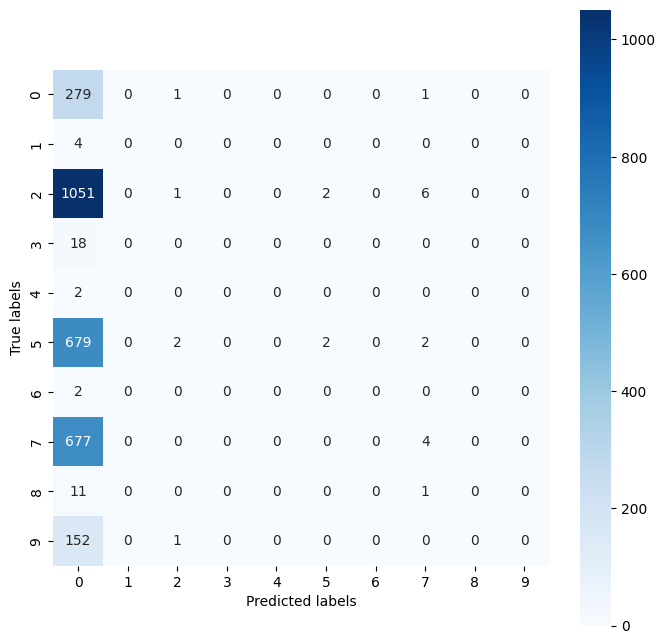

In [11]:
print(y_test_ohe)
print(preds)

pred = np.where(preds> 0.5, 1 , 0) #0.5보다크면 2, 작으면 1

print(pred)


# 오차 행렬 시각화
cm = confusion_matrix(y_test_ohe.argmax(axis=1), pred.argmax(axis=1))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()



SVM

In [12]:
from sklearn.svm import SVC

svm_model = SVC(kernel='poly', C=1)

svm_model.fit(X_train.fillna(0), y_train)

preds = svm_model.predict(X_test.fillna(0))

accuracy = accuracy_score(y_test, preds)

print(accuracy)

0.3657694962042788


In [13]:
df2 = pd.read_excel('/content/analydata.xlsx')
df2.replace({'개인(급.만성)질환':0}, inplace= True)
df2.replace({'개인질환':0}, inplace= True)
df2.replace({'고온환경질환':0}, inplace= True)
df2.replace({'기타산악':0}, inplace= True)
df2.replace({'낙석·낙빙':0}, inplace= True)
df2.replace({'산악기타':0}, inplace= True)
df2.replace({'실족추락':1}, inplace= True)
df2.replace({'암벽등반':0}, inplace= True)
df2.replace({'야생식물 섭취 중독':0}, inplace= True)
df2.replace({'일반조난':1}, inplace= True)
df2.replace({'저체온증':1}, inplace= True)
df2.replace({'탈진·탈수':1}, inplace= True)
df2.replace({'자살기도(산악)':0}, inplace= True)

df2.head()

,사고원인코드명_사고종별,기온(°C),강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),현지기압(hPa),적설(cm),지면온도(°C)
0,1,2.0,NaN,1.5,71.0,-2.7,1005.9,NaN,0.7
1,1,2.0,NaN,1.5,71.0,-2.7,1005.9,NaN,0.7
2,0,11.2,NaN,1.5,37.0,-2.9,1009.8,NaN,9.9
3,1,3.1,NaN,0.2,78.0,-0.3,1018.4,NaN,0.1
4,1,5.4,NaN,0.6,62.0,-1.3,1009.3,NaN,0.9


SVM, LSTM, RNN, DNN

In [23]:
# 입력 변수와 출력 변수로 분리
X2 = df2.drop('사고원인코드명_사고종별', axis=1)
y2 = df2['사고원인코드명_사고종별']

# 학습 데이터와 검증 데이터로 분리
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

#SVM -> 0/1 encoding

from sklearn.svm import SVC

svm_model = SVC(kernel='poly', C=1)

svm_model.fit(X2_train.fillna(0), y2_train)

preds2 = svm_model.predict(X2_test.fillna(0))

accuracy = accuracy_score(y2_test, preds2)

print("SVM:",accuracy)


SVM: 0.528295376121463


In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 입력 변수와 출력 변수로 분리
X2 = df2.drop('사고원인코드명_사고종별', axis=1)
y2 = df2['사고원인코드명_사고종별']

# One-hot encoding
encoder = LabelEncoder()
encoder.fit(y2)
encoded_y = encoder.transform(y2)
onehot_y = np.eye(encoded_y.max()+1)[encoded_y]

# 학습 데이터와 검증 데이터로 분리
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, onehot_y, test_size=0.2, random_state=42)

# 데이터 전처리 -> 입력특성과 타임스텝은 유동적으로
n_timesteps = 1  # 타임스텝 수
n_features = 8  # 입력 특성 수

X2_train = X2_train.to_numpy().reshape(X2_train.shape[0], n_timesteps, n_features)
X2_test = X2_test.to_numpy().reshape(X2_test.shape[0], n_timesteps, n_features)

# 모델 구성
model = Sequential()
model.add(LSTM(units=32, input_shape=(n_timesteps, n_features)))
model.add(Dense(units=onehot_y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X2_train, y2_train, epochs=10, batch_size=32)

# 모델 평가
accuracy = model.evaluate(X2_test, y2_test)[1]
print("LSTM:", accuracy)

Epoch 1/10
363/363 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.4680
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.4680
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.4680
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.4680
Epoch 5/10
363/363 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.4680
Epoch 6/10
363/363 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.4680
Epoch 7/10
363/363 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.4680
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4680
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4680
Epoch 10/10
91/91 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.4717
LSTM: 0.4717046320438385
